In [2]:
import pandas as pd
import csv
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from scipy.stats import linregress

In [3]:
kindle_csv = "./kindle_data_clean.csv"
kindle_data = pd.read_csv(kindle_csv)
kindle_data

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...,...
982592,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600
982593,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600
982594,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600
982595,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600


In [4]:
# df_group = kindle_data.groupby("reviewerID")
# df_mean = df_group["overall"].mean()
# review_5 = df_mean.loc[df_mean == 5]
# reviewer_df = df_mean.drop(review_5.index)
# reviewer_list = reviewer_df.index.tolist()
# kindle_data = kindle_data.loc[kindle_data["reviewerID"].isin(reviewer_list), :]

In [5]:
review_year = []
for x in kindle_data['reviewTime']:
    y = x[-4:]
    review_year.append(y)

In [6]:
kindle_data["Review Year"] = review_year
kindle_data

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Review Year
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2014
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2014
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014
...,...,...,...,...,...,...,...,...,...,...,...
982592,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600,2014
982593,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600,2014
982594,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600,2014
982595,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600,2014


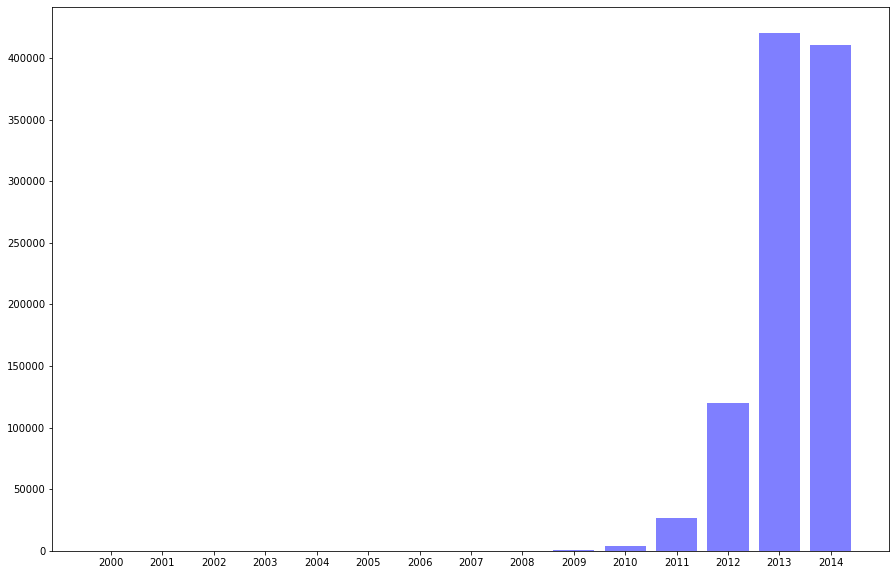

In [7]:
# ####

year_group = kindle_data.groupby("Review Year").size()
labels = year_group.index
x_axis = np.arange(len(labels))
plt.figure(figsize=(15, 10))
plt.bar(x_axis, year_group, color='blue', alpha=0.5, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)
plt.show()

In [8]:
# Does any relationship lie between ratings and total ratings?

kindle_group = kindle_data.groupby("overall")
kindle_size = kindle_group.size()

In [9]:
kindle_group = kindle_data.groupby("asin")
kindle_size = kindle_group.size()
kindle_avg = kindle_group.mean()
# kindle_df = pd.DataFrame({"Review Count": kindle_size, "Review Average": kindle_avg})
kindle_df = pd.DataFrame(kindle_avg)
kindle_df["Review Count"] = kindle_size
kindle_df = kindle_df.rename(columns = {"overall": "Review Average"})
kindle_df = kindle_df[["Review Count", "Review Average"]]
kindle_df

,Review Count,Review Average
asin,,
B000F83SZQ,8,4.250000
B000FA64PA,5,4.200000
B000FA64PK,8,4.375000
B000FA64QO,5,3.800000
B000FBFMVG,9,4.333333
...,...,...
B00LZFHL7Y,16,4.750000
B00LZKMXBI,75,4.813333
B00M029T4O,11,4.909091


In [10]:
bins = [0,1.999,2.999,3.999,4.999,5]
labels = ["1-2 Stars", "2-3 Stars", "3-4 Stars", "4-5 Stars","5 Stars"]

kindle_df["Review Bin"] = pd.cut(kindle_df["Review Average"], bins, labels = labels, include_lowest = True)
kindle_df

,Review Count,Review Average,Review Bin
asin,,,
B000F83SZQ,8,4.250000,4-5 Stars
B000FA64PA,5,4.200000,4-5 Stars
B000FA64PK,8,4.375000,4-5 Stars
B000FA64QO,5,3.800000,3-4 Stars
B000FBFMVG,9,4.333333,4-5 Stars
...,...,...,...
B00LZFHL7Y,16,4.750000,4-5 Stars
B00LZKMXBI,75,4.813333,4-5 Stars
B00M029T4O,11,4.909091,4-5 Stars


In [14]:
rating_group = kindle_df.groupby("Review Bin").size()
print(rating_group)

plt.figure(figsize=(10, 10))

ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))])
plt.pie(rating_group, labels = labels,theme = get_cmap('blue'), autopct = "%1.1f%%", shadow=True,startangle = 0)
                             
plt.show()

Review Bin
1-2 Stars       64
2-3 Stars      823
3-4 Stars    10734
4-5 Stars    45595
5 Stars       4718
dtype: int64


NameError: name 'ax1' is not defined

<Figure size 720x720 with 0 Axes>

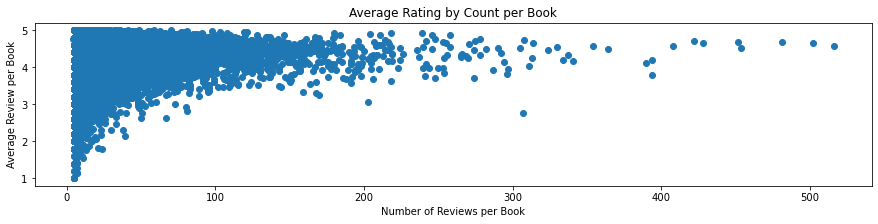

In [15]:
kindle_df = kindle_df.loc[kindle_df["Review Count"] < 600]

plt.figure(figsize=(15, 3))
plt.scatter(kindle_df["Review Count"], kindle_df["Review Average"])

plt.xlabel("Number of Reviews per Book")
plt.ylabel("Average Review per Book")
plt.title("Average Rating by Count per Book")

plt.savefig("./Scatter_pre_5_removal.png")
plt.show()

In [16]:
kindle_df.loc[kindle_df["Review Count"] > 600]

,Review Count,Review Average,Review Bin
asin,,,
